# RANK PREDICTOR

# importing Relevant Library and Regression models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression


C:\Users\amanr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# importing data 

In [2]:
data=pd.read_csv(r"C:\Users\amanr\Desktop\test_data.csv")

# showing data

In [3]:
data

,MARKS,RANK
0,93,24946
1,93,24722
2,94,24265
3,95,23751
4,96,23259
...,...,...
250,342,2
251,343,1
252,344,1
253,345,1


# describing data basic features like mean ,standard deviation,etc.

data.describe()

# assigning data on axis 


In [4]:
x=data["MARKS"]
y=data["RANK"]





# transformation of axis to get standard plot(to create good model)

In [5]:
y_formatted=(np.log(y)/np.log(5))**1.50

# using LinearRegression class to create an object/model named "reg"

In [6]:
reg=LinearRegression()

# checking shape of independent variable

In [7]:
x.shape


(255,)

# changing dimension of x to make it valid matrix

In [8]:
x_matrix=x.values.reshape(255,1)



# fitting data to model

In [9]:
reg.fit(x_matrix,y_formatted)

LinearRegression()

# calculating statistical features

In [10]:
coef=reg.coef_

In [11]:
icpt=reg.intercept_

# ploting formatted data on graph

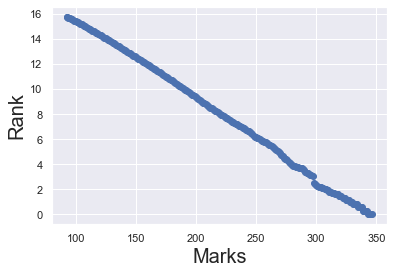

In [12]:
plt.scatter(x_matrix,y_formatted)
plt.xlabel("Marks",fontsize=20)
plt.ylabel("Rank",fontsize=20)
plt.show()

# creating Regression line and plotting it with original data

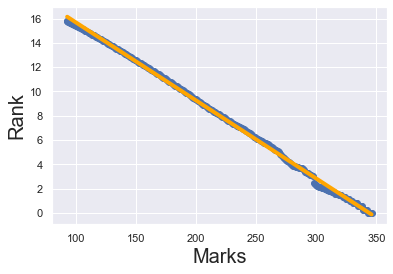

In [13]:
plt.scatter(x_matrix,y_formatted)
yhat=coef*x_matrix+icpt
fig=plt.plot(x_matrix,yhat,lw=4,c="orange",label="regression line")
plt.xlabel("Marks",fontsize=20)
plt.ylabel("Rank",fontsize=20)
plt.show()

# above graph shows that our regression model doing best as it fitted almost completely to original dataset.

# creating dataframe for two columns(actual output,predicted output)

In [14]:
new_data=x.values.reshape(255,1)




# predicted value column in dataframe

In [15]:
predicted_array1=((5)**(reg.predict(new_data))**(1/1.50)).round(0)

C:\Users\amanr\AppData\Local\Temp\ipykernel_27848\3658383574.py:1: RuntimeWarning: invalid value encountered in power
  predicted_array1=((5)**(reg.predict(new_data))**(1/1.50)).round(0)


In [16]:
predictiondfs=pd.DataFrame({"Predicted Rank":predicted_array1})
joined=data.join(predictiondfs)


# calculating Accuracy of my Model

In [17]:
count=0
diff=0.4
for i in range(255):
    if abs(joined["RANK"][i]-joined["Predicted Rank"][i])<=diff*joined["RANK"][i]:
        count+=1
accuracy=count*100/255

# ACCURACY

In [18]:
print(f"Accuracy={math.ceil(accuracy)}")

Accuracy=97


# Predicting Rank using My model on test data

In [19]:
test_marks=110
new_data2=pd.DataFrame(data=[test_marks],columns=["Predicted rank"])

In [20]:

predicted_array2=((5)**(reg.predict(new_data2))**(1/1.50)).round(0)


C:\Users\amanr\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Prdeicted RANK

In [21]:
def prediction_rank(predicted_array2):
    if predicted_array2[0].round(0)>=1:
        return (int(predicted_array2[0]))

    else:
        return (1)
rank=prediction_rank(predicted_array2)
print(rank)

18253


# Saving modified table to local worksplace

joined.to_csv(r"C:\Users\amanr\Desktop\Rank_Predictor.csv",index=False)

# COLLEGE PREDICTOR

# importing sql library for robust queries

In [22]:
import sqlite3

In [23]:
!pip install ipython-sql

# IMPORTING COLLEGE -RANK DATASET TO PREDICT COLLEGE

In [24]:
data1=pd.read_csv(r"C:\Users\amanr\Desktop\josaa_cp.csv").head(23)

# adding predicted rank column to original table for clear visualisation.

In [25]:
data1["rank"]=rank
data1

,Institute,Openingrank,Closingrank,rank
0,Indian Institute of Technology Bhubaneswar,50,13231,18253
1,Indian Institute of Technology Bombay,1,10859,18253
2,Indian Institute of Technology Mandi,120,19089,18253
3,Indian Institute of Technology Delhi,2,11722,18253
4,Indian Institute of Technology Indore,23,15810,18253
5,Indian Institute of Technology Kharagpur,2,19104,18253
6,Indian Institute of Technology Hyderabad,9,12683,18253
7,Indian Institute of Technology Jodhpur,56,20939,18253
8,Indian Institute of Technology Kanpur,4,17093,18253
9,Indian Institute of Technology Madras,3,14212,18253


# connecting notebook to database

In [26]:
cnn=sqlite3.connect("college_predictor.db")

In [27]:
data1.to_sql("college",cnn,if_exists="replace")

23

In [28]:
%load_ext sql

In [29]:
%sql sqlite:///college_predictor.db

# writing query to fetch required data

In [30]:

%%sql

select Institute as Predicted_Institutes from college
where Closingrank>=rank
order by institute
;


 * sqlite:///college_predictor.db
Done.


Predicted_Institutes
Indian Institute of Technology (BHU) Varanasi
Indian Institute of Technology (ISM) Dhanbad
Indian Institute of Technology Jammu
Indian Institute of Technology Jodhpur
Indian Institute of Technology Kharagpur
Indian Institute of Technology Mandi
Indian Institute of Technology Palakkad
Indian Institute of Technology Patna
Indian Institute of Technology Ropar
Indian Institute of Technology Tirupati
